# 2-1. 미니 프로젝트:가위바위보 분류기를 만들자
# 2024.8.1
# 14:47 ~ 17:40
# 구태훈

In [146]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.17.0
1.26.4


In [147]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [148]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/DS2/DL/rock_scissor_paper/mix/scissor"
#os.getenv("HOME") +
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")



100  images to be resized.


<ipython-input-148-0663e8f9ede5>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
가위 이미지 resize 완료!


In [149]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/DS2/DL/rock_scissor_paper/mix/rock"
#os.getenv("HOME") +
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")



100  images to be resized.


<ipython-input-149-7fd9aa603627>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
바위 이미지 resize 완료!


In [150]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/DS2/DL/rock_scissor_paper/mix/paper"
#os.getenv("HOME") +
resize_images(image_dir_path)

print("보 이미지 resize 완료!")



100  images to be resized.


<ipython-input-150-c8d9042fec21>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
보 이미지 resize 완료!


In [151]:
import numpy as np

def load_data(img_path, number_of_data=300): # 가위바위보 이미지 개수 총합에 주의하세요.
  # 가위 : 0, 바위 : 1, 보 : 2
  img_size=28
  color=3
  # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix)영역을 생성합니다.
  imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
  labels = np.zeros(number_of_data, dtype = np.int32)

  idx=0
  for file in glob.iglob(img_path+'/scissor/*.jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
    labels[idx]=0 # 가위 : 0
    idx=idx+1

  for file in glob.iglob(img_path+'/rock/*.jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
    labels[idx]=1 # 바위 : 1
    idx=idx+1
  for file in glob.iglob(img_path+'/paper/*.jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
    labels[idx]=2 # 보 : 2
    idx=idx+1

  print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
  return imgs, labels

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/DS2/DL/rock_scissor_paper/mix"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0 # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


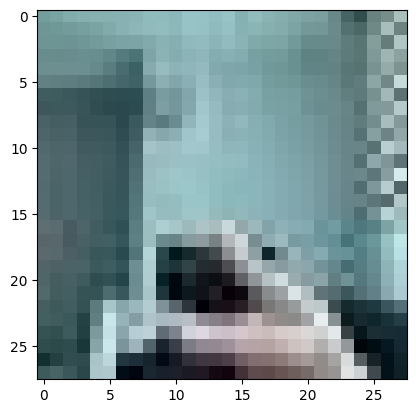

In [152]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [153]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=16
n_train_epoch=30

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 26, 26, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 16)                  │          12,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,955 (70.14 KB)

 Trainable params: 17,955 (70.14 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
# 학습

In [155]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3407 - loss: 14.3933
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4467 - loss: 2.4825
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4531 - loss: 1.6047
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3816 - loss: 1.1474
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5302 - loss: 0.9669
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5401 - loss: 0.9501
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5858 - loss: 0.8841
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5933 - loss: 0.8302
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6260 - loss: 0.7885
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5822 - loss: 0.7979
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5729 - loss: 0.7713
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy

In [156]:
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/DS2/DL/rock_scissor_paper/test_mix/scissor"
resize_images(image_dir_path)

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/DS2/DL/rock_scissor_paper/test_mix/rock"
resize_images(image_dir_path)

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/DS2/DL/rock_scissor_paper/test_mix/paper"
resize_images(image_dir_path)

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/DS2/DL/rock_scissor_paper/test_mix"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0 # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.


<ipython-input-150-c8d9042fec21>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [157]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 34ms/step - accuracy: 0.5600 - loss: 1.6793
test_loss: 1.6792709827423096 
test_accuracy: 0.5600000023841858


# 회고
*  제한된 훈련 데이터로 세 가지 방법으로 실험을 했습니다. 위 작성된 데이터셋과 코드는 마지막 3번째 실험의 코드입니다.

* 1. 구태훈 손 학습 -> 이나영님 손 테스트 결과
  * 10/10 - 0s - 23ms/step - accuracy: 0.3400 - loss: 7.3852
  * test_loss: 7.385173320770264
  * test_accuracy: 0.3400000035762787
  * 저의 손만 사용해서 학습을 했습니다. 학습양이 적은데다 편파적인 학습 데이터로 학습되었습니다.
  * 훈련 데이터에 비해 테스트 데이터의 정확도가 낮고 로스가 많이 높게 나왔습니다.
  * 로스가 높고 정밀도가 떨어지는 것은 테스트에 쓰인 손을 학습하지 못한 것으로 보입니다.
  * 훈련 데이터에 과적합된 점이 예상이 됩니다.
  * 비슷한 모양의 손이 아니면 테스트 데이터에 적용하기 어려울 수 있습니다.

* 2. 구태훈 손 0-49 + 이나연님 손 50-100 학습 -> 구태훈 손 0-49  + 이나연님 손 50-100 테스트 결과
  * 10/10 - 0s - 33ms/step - accuracy: 1.0000 - loss: 0.0057
  * test_loss: 0.005671481601893902
  * test_accuracy: 1.0
  * 예상한 결과지만 훈련된 데이터로 테스트 했을 때 높은 정밀도와 낮은 로스를 보였습니다.
  * 현실에 쓸 수 없는 방식의 테스트였습니다.

* 3. 구태훈 손 0-49 + 이나영님 손 50-100 학습 -> 이나영 손 0-49 + 구태훈 손 50-100 테스트 결과
  * 10/10 - 0s - 34ms/step - accuracy: 0.5600 - loss: 1.6793
  * test_loss: 1.6792709827423096
  * test_accuracy: 0.5600000023841858
  * 저의 손과 이나연님의 손을 반을 섞어 훈련을 하고 테스트에는 훈련에 사용되지 않은 나머지 반을 사용했습니다.
  * 위 1,2번 테스트의 중간 정도 결과가 나왔습니다.
  * 테스트에 사용될 법한 손으로 훈련한 결과입니다.
* 과적합을 방지 하기 위해 많고 다양한 손 모양의 훈련을 통해 높은 정밀도와 낮은 로스를 기록할 것이 예상됩니다.
